# Machine Learning using Jupyter notebook
#### Westgrid 


## Pandas vs numpy ?
Pandas is more for heterogeneous data (mixed between different types of data) and for homogoneneous daya, it's better to use numpy.

## sklearn
 - used for data mining and data analysis. <br>
 - built on Numpy, Scipy, matplotlib <br>
 - Models : Classification (logistic), Regression (linear), Clustering, Model Selection(PCA), Preprocessing(scaling), Dimensionality Reduction(grid search).

# Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

[Source of data](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)


### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

# Loading Libraries

In [1]:
%matplotlib inline

# To handle the missing values and maintain the accuracy of a large proportion of data.
from sklearn.ensemble import RandomForestRegressor
# Linear Regression Library
from sklearn.linear_model import LinearRegression

# For splitting the dataset into test and Train 
from sklearn.model_selection import train_test_split

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt 

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Load the data and visualize it

In [2]:
data = pd.read_csv("power_data.csv")
data.head()

,T,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data = pd.read_csv("power_data.csv", header=0 , names = ['Temp','Vacuum','Pressure','Humidity','Power'])
data.head()

,Temp,Vacuum,Pressure,Humidity,Power
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
#get some stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,38272.0,19.651231,7.452181,1.81,13.5100,20.345,25.72,37.11
Vacuum,38272.0,54.305804,12.707395,25.36,41.7400,52.080,66.54,81.56
Pressure,38272.0,1013.259078,5.938551,992.89,1009.1000,1012.940,1017.26,1033.30
Humidity,38272.0,73.308978,14.599697,25.56,63.3275,74.975,84.83,100.16
Power,38272.0,454.365009,17.066326,420.26,439.7500,451.550,468.43,495.76


## Exploratory Data Analysis

In [5]:
# get correlations between the columns
data.corr()

,Temp,Vacuum,Pressure,Humidity,Power
Temp,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Power,-0.948128,-0.869780,0.518429,0.389794,1.000000


It appears that there is a linear regression between Temperature and Power and We can check it out by plotting.

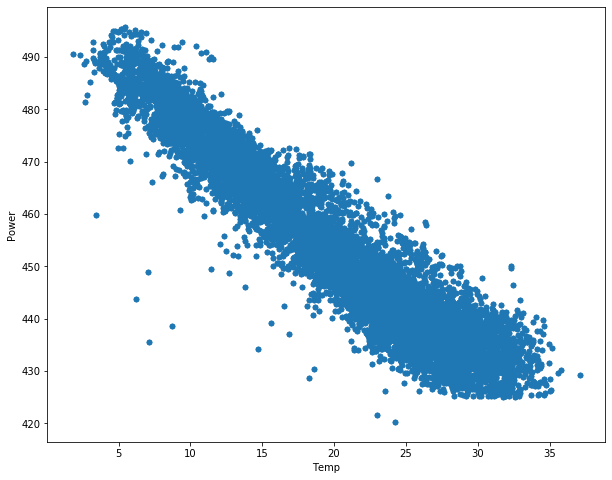

In [6]:
#pandas way to plot dats, choose x,y , figsize is optional
data.plot(kind = 'scatter', x = 'Temp', y = 'Power', figsize = (10,8))

It appears that there is a multi-correlation between Temperature and Pressure and We can check it out by plotting.

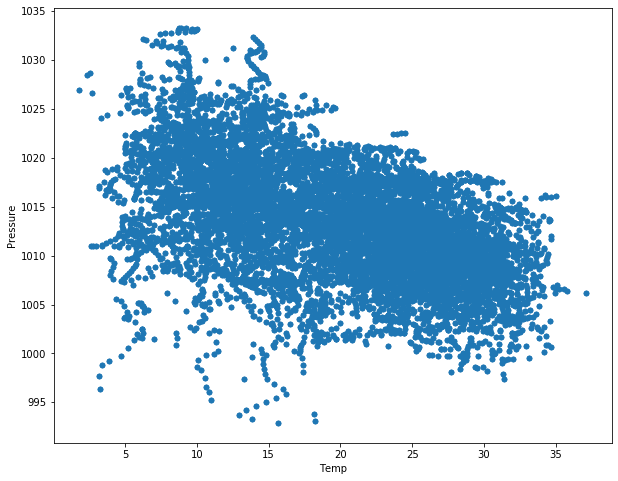

In [7]:
#pandas way to plot dats, choose x,y , figsize is optional
data.plot(kind = 'scatter', x = 'Temp', y = 'Pressure', figsize = (10,8))

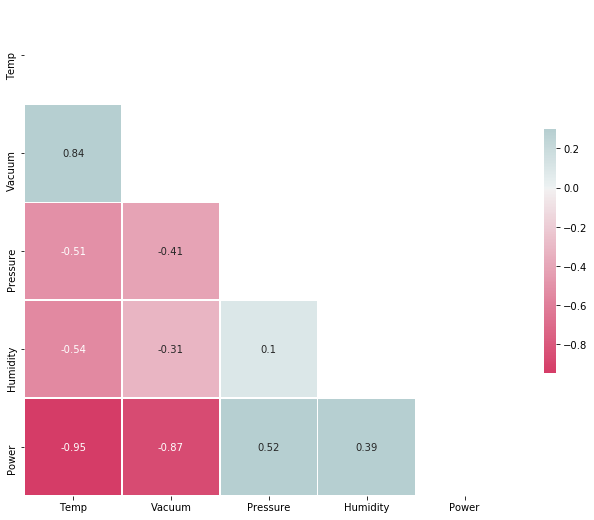

In [8]:
# we will form a correlation graph

# Numerical libraries
import numpy as np

#importing seaborn for statistical plots
import seaborn as sns

corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot  = True)

- Power has a strong negative correlation with 'Ambient Temperature' and 'Exhaust Vacuum' of the Plant. So, it seems that as Temperature or Vacuum increases the Power output of the Plant decreases.
- Similarly, Power has a positive correlation with Pressure and Humidity. It seems that on increasing Humidity and Pressure, the Power output will increase.
- Vacuum has a strong positive correlation with Temperature of the plant and also Humidity has a small positive correlation with Pressure.


All the other non Power linkages have a negative correlation.

# Partition of the data into Training and Testing data sets


In [9]:
X = data[['Temp','Vacuum','Humidity','Power']]

In [10]:
y = data['Pressure']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [12]:
print("total records:", len(X) )

total records: 38272


In [13]:
print("total training records:", len(X_train) )

total training records: 26790


# Linear Regression

Lets use all the computer power that we requested which is 2 cores in this case.

In [14]:
lr = LinearRegression(n_jobs =2)

In [15]:
lrModel = lr.fit(X_train, y_train)

In [16]:
lrModel.coef_

array([-0.50870482,  0.10473239, -0.10447653,  0.07209361])

Clearly, the temperature is the one which is dominating.

In [17]:
lrModel.predict(X_test)

array([1013.65936914, 1007.44493617, 1019.0597882 , ..., 1018.01116501,
       1009.43314345, 1016.29780782])

The coefficient $R^2$ determines the residual sum of squares and the best score is 1 and  can be negative too. 

In [18]:
print("Linear Regression R2 = ",lrModel.score(X_test, y_test))

Linear Regression R2 =  0.3210689775276325


In [19]:
y_pred = lrModel.predict(X_test)

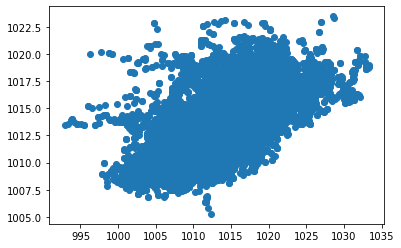

In [20]:
plt.scatter(y_test,y_pred)

Since Linear Regression did not perform a fair job, we could test the Forest Regressor and see if this gives a better approach.

# Random Forest Regressor

In [21]:
rf = RandomForestRegressor()

In [22]:
rf

RandomForestRegressor()

In [23]:
rfModel = rf.fit(X_train,y_train)

In [24]:
rfModel

RandomForestRegressor()

In [25]:
rfModel.feature_importances_ #this will give us an idea which feature has more impact

array([0.1470236 , 0.39978286, 0.11099224, 0.34220131])

In [26]:
print("RF R2", rfModel.score(X_test,y_test))

RF R2 0.9912678943997593


In [27]:
y_pred = rfModel.predict(X_test)

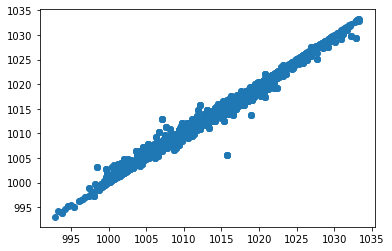

In [28]:
plt.scatter(y_test,y_pred)

Clearly, its more linear than the previous case. Still we can improve our result by playing with paramaters and that's when cross-validation is needed.

# Cross- Validation and Grid Search

CV = Cross-Validation is used to overcome **overfitting**. What one does is to take the training data set and split into two parts: training and validating. Then we train our model with a training data set and then we validate it with the validating dataset. We don't touch the testing dataset since this will be used to score our estimator. This is repetitive and sklearn has function to do this. It uses the k - fold. The training set is split into k smaller sets, then

- A model is trained using k-1 of the folds as training data
- the resulting model is validated on the remaining part of the data


Hyperparameters are parameters that are not directly learnt within estimators. In sklearn, they are passed as arguments to the contructor of the estimator classes. It is possible and recommended to search the hyper-parameter space for the best cross validation score.

In [30]:
parameters = {'n_estimators': [10,50,100]}

In [33]:
rf.set_params(n_jobs = -1)

RandomForestRegressor(n_jobs=-1)

### Create the grid search with Cross validation

In [35]:
from sklearn.model_selection import GridSearchCV

rfGrid = GridSearchCV(rf,parameters,cv = 5, return_train_score=True) # set k=5 folds

In [36]:
%%time
rfModels = rfGrid.fit(X_train,y_train)

CPU times: user 23.7 s, sys: 744 ms, total: 24.4 s
Wall time: 33.7 s


In [37]:
rfModels.cv_results_

{'mean_fit_time': array([0.65015159, 1.54408865, 3.03662782]),
 'std_fit_time': array([0.62796794, 0.04881855, 0.04789795]),
 'mean_score_time': array([0.10698142, 0.10588603, 0.10609751]),
 'std_score_time': array([0.00230199, 0.00032955, 0.00084487]),
 'param_n_estimators': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}],
 'split0_test_score': array([0.96730312, 0.97606293, 0.97671439]),
 'split1_test_score': array([0.96522973, 0.97240835, 0.97305794]),
 'split2_test_score': array([0.96853285, 0.97722043, 0.97932948]),
 'split3_test_score': array([0.96535286, 0.97390372, 0.97422917]),
 'split4_test_score': array([0.96687851, 0.97369242, 0.97428938]),
 'mean_test_score': array([0.96665941, 0.97465757, 0.97552407]),
 'std_test_score': array([0.00124283, 0.00173793, 0.00224415]),
 'rank_test_score': array([3, 2, 1], dtype=int32),
 

## Find the best model

In [38]:
rfModels.best_estimator_

RandomForestRegressor(n_jobs=-1)

In [39]:
bestModel = rfModels.best_estimator_

In [40]:
y_pred = bestModel.predict(X_test)

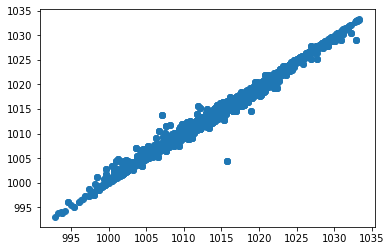

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
print("Best model R2", bestModel.score(X_test,y_test))

Best model R2 0.9908935890705554
